In [ ]:
from google.colab import files
uploaded = files.upload()


Saving adult 3.csv to adult 3.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
# Load the uploaded file (adjust the filename if needed)
df = pd.read_csv('adult 3.csv')

# Replace '?' with NaN and drop rows with missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Drop the 'education' column and keep 'educational-num'
df.drop(columns=['education'], inplace=True)

# Drop 'fnlwgt' as it's not useful
df.drop(columns=['fnlwgt'], inplace=True)


In [ ]:
# One-hot encode all categorical columns
df = pd.get_dummies(df)


In [ ]:
# Outlier Detection using IQR for numeric columns
numeric_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [ ]:
# Use 'income_>50K' as the binary target
X = df.drop(columns=['income_<=50K', 'income_>50K'])
y = df['income_>50K']  # 1 if >50K, else 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy Score: 0.8453289110005527

📊 Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.92      0.90      6803
        True       0.72      0.62      0.66      2242

    accuracy                           0.85      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.85      0.84      9045


🧾 Confusion Matrix:
 [[6259  544]
 [ 855 1387]]


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

# Create and train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:31:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict using XGBoost
xgb_pred = xgb_model.predict(X_test)

# Evaluation metrics
print("✅ XGBoost Accuracy Score:", accuracy_score(y_test, xgb_pred))
print("\n📊 XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("\n🧾 XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))


✅ XGBoost Accuracy Score: 0.8646766169154229

📊 XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.94      0.91      6803
        True       0.77      0.64      0.70      2242

    accuracy                           0.86      9045
   macro avg       0.83      0.79      0.81      9045
weighted avg       0.86      0.86      0.86      9045


🧾 XGBoost Confusion Matrix:
 [[6376  427]
 [ 797 1445]]


<Figure size 1000x800 with 0 Axes>

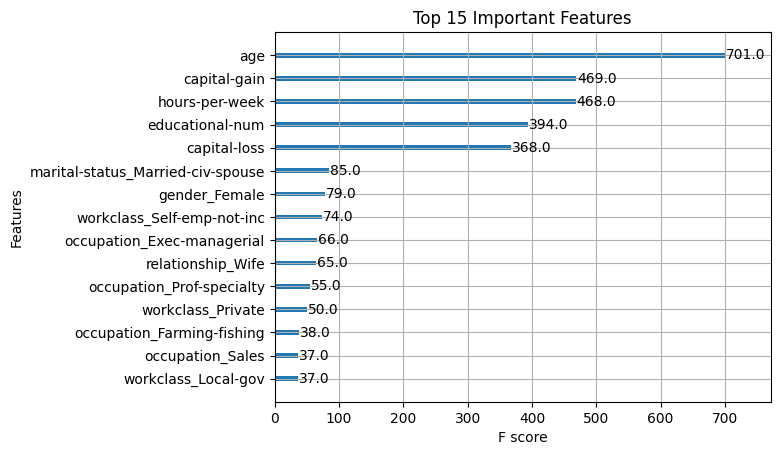

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=15)
plt.title("Top 15 Important Features")
plt.show()


In [ ]:
!pip install lightgbm


In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(max_depth=6, random_state=42)

In [ ]:
lgbm_pred = lgbm_model.predict(X_test)

print("✅ LightGBM Accuracy Score:", accuracy_score(y_test, lgbm_pred))
print("\n📊 LightGBM Classification Report:\n", classification_report(y_test, lgbm_pred))
print("\n🧾 LightGBM Confusion Matrix:\n", confusion_matrix(y_test, lgbm_pred))


✅ LightGBM Accuracy Score: 0.8658927584300719

📊 LightGBM Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.94      0.91      6803
        True       0.78      0.64      0.70      2242

    accuracy                           0.87      9045
   macro avg       0.83      0.79      0.81      9045
weighted avg       0.86      0.87      0.86      9045


🧾 LightGBM Confusion Matrix:
 [[6387  416]
 [ 797 1445]]


In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate models
rf_acc = accuracy_score(y_test, model.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
lgbm_acc = accuracy_score(y_test, lgbm_model.predict(X_test))

# Compare
print("Random Forest Accuracy:", rf_acc)
print("XGBoost Accuracy:", xgb_acc)
print("LightGBM Accuracy:", lgbm_acc)

# Find the best model
best_model = max(
    [('Random Forest', model, rf_acc),
     ('XGBoost', xgb_model, xgb_acc),
     ('LightGBM', lgbm_model, lgbm_acc)],
    key=lambda x: x[2]
)

print("\n✅ Best Model:", best_model[0])

Random Forest Accuracy: 0.8453289110005527
XGBoost Accuracy: 0.8646766169154229
LightGBM Accuracy: 0.8658927584300719

✅ Best Model: LightGBM


In [ ]:
import pickle

# Save model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model[1], f)


In [ ]:
from google.colab import files
files.download('best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title("💼 Employee Salary Prediction App")

# Input fields
age = st.number_input("Age", min_value=18, max_value=100)
education_num = st.slider("Education Number", 1, 16)
capital_gain = st.number_input("Capital Gain", 0)
capital_loss = st.number_input("Capital Loss", 0)
hours_per_week = st.slider("Hours Per Week", 1, 100)

# Total expected features by the model
expected_features = model.n_features_in_

# Manually entered fields: age, education_num, capital_gain, capital_loss, hours_per_week (5 fields)
manual_features = [age, education_num, capital_gain, capital_loss, hours_per_week]

# Fill remaining with 0s to match what was done during one-hot encoding
input_data = np.array([manual_features + [0] * (expected_features - len(manual_features))])


if st.button("Predict Salary Category"):
    prediction = model.predict(input_data)
    st.success("Predicted Income: >50K" if prediction[0] == 1 else "Predicted Income: <=50K")


Overwriting app.py


In [27]:
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit
!streamlit run app.py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.119.75:8501

  Stopping...
  Stopping...
